In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd
from scipy.io import arff

In [10]:
data, meta = arff.loadarff('seismic-bumps.arff')
df = pd.DataFrame(data)
df.shape

(2584, 19)

## Dekodujemy kolumny będące object

In [4]:
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.decode('utf-8')

df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180.0,48.0,-72.0,-72.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,a,a,N,14720.0,33.0,-70.0,-79.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0
2,a,a,N,8050.0,30.0,-81.0,-78.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,a,a,N,28820.0,171.0,-23.0,40.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0
4,a,a,N,12640.0,57.0,-63.0,-52.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seismic         2584 non-null   object 
 1   seismoacoustic  2584 non-null   object 
 2   shift           2584 non-null   object 
 3   genergy         2584 non-null   float64
 4   gpuls           2584 non-null   float64
 5   gdenergy        2584 non-null   float64
 6   gdpuls          2584 non-null   float64
 7   ghazard         2584 non-null   object 
 8   nbumps          2584 non-null   float64
 9   nbumps2         2584 non-null   float64
 10  nbumps3         2584 non-null   float64
 11  nbumps4         2584 non-null   float64
 12  nbumps5         2584 non-null   float64
 13  nbumps6         2584 non-null   float64
 14  nbumps7         2584 non-null   float64
 15  nbumps89        2584 non-null   float64
 16  energy          2584 non-null   float64
 17  maxenergy       2584 non-null   f

### Informacje o atrybutach:

1. seismic: wynik zmianowej oceny zagrożenia sejsmicznego w wyrobisku górniczym uzyskany metodą sejsmiczną
(a – brak zagrożenia, b – niskie zagrożenie, c – wysokie zagrożenie, d – stan zagrożenia);

2. seismoacoustic: wynik zmianowej oceny zagrożenia sejsmicznego w wyrobisku górniczym uzyskany metodą sejsmoakustyczną;

3. shift: informacja o rodzaju zmiany
(W – zmiana wydobywcza, N – zmiana przygotowawcza);

4. genergy: energia sejsmiczna zarejestrowana podczas poprzedniej zmiany przez najbardziej aktywny geofon (GMax) spośród geofonów monitorujących ścianę;

5. gpuls: liczba impulsów zarejestrowanych podczas poprzedniej zmiany przez GMax;

6. gdenergy: odchylenie energii zarejestrowanej podczas poprzedniej zmiany przez GMax od średniej energii zarejestrowanej w ośmiu poprzednich zmianach;

7. gdpuls: odchylenie liczby impulsów zarejestrowanych podczas poprzedniej zmiany przez GMax od średniej liczby impulsów zarejestrowanych w ośmiu poprzednich zmianach;

8. ghazard: wynik zmianowej oceny zagrożenia sejsmicznego w wyrobisku górniczym uzyskany metodą sejsmoakustyczną na podstawie rejestracji wyłącznie z GMax;

9. nbumps: liczba wstrząsów sejsmicznych zarejestrowanych podczas poprzedniej zmiany;

10. nbumps2: liczba wstrząsów sejsmicznych (w zakresie energii [10², 10³)) zarejestrowanych podczas poprzedniej zmiany;

11. nbumps3: liczba wstrząsów sejsmicznych (w zakresie energii [10³, 10⁴)) zarejestrowanych podczas poprzedniej zmiany;

12. nbumps4: liczba wstrząsów sejsmicznych (w zakresie energii [10⁴, 10⁵)) zarejestrowanych podczas poprzedniej zmiany;

13. nbumps5: liczba wstrząsów sejsmicznych (w zakresie energii [10⁵, 10⁶)) zarejestrowanych podczas ostatniej zmiany;

14. nbumps6: liczba wstrząsów sejsmicznych (w zakresie energii [10⁶, 10⁷)) zarejestrowanych podczas poprzedniej zmiany;

15. nbumps7: liczba wstrząsów sejsmicznych (w zakresie energii [10⁷, 10⁸)) zarejestrowanych podczas poprzedniej zmiany;

16. nbumps89: liczba wstrząsów sejsmicznych (w zakresie energii [10⁸, 10¹⁰)) zarejestrowanych podczas poprzedniej zmiany;

17. energy: całkowita energia wstrząsów sejsmicznych zarejestrowanych podczas poprzedniej zmiany;

18. maxenergy: maksymalna energia wstrząsu sejsmicznego zarejestrowanego podczas poprzedniej zmiany;

19. class: atrybut decyzyjny — „1” oznacza wystąpienie wstrząsu sejsmicznego o wysokiej energii w następnej zmianie
(„stan zagrożenia”), natomiast „0” oznacza brak wystąpienia wstrząsów sejsmicznych o wysokiej energii w następnej zmianie
(„stan niezagrożony”).

In [6]:
df.describe()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000


In [7]:
df.isnull().sum()

seismic           0
seismoacoustic    0
shift             0
genergy           0
gpuls             0
gdenergy          0
gdpuls            0
ghazard           0
nbumps            0
nbumps2           0
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
class             0
dtype: int64

In [8]:
df['class'].value_counts()

class
0    2414
1     170
Name: count, dtype: int64

In [11]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(cat_cols)
for col in cat_cols:
    print(f"\nKolumna: {col}")
    print(df[col].value_counts())

Index(['seismic', 'seismoacoustic', 'shift', 'ghazard', 'class'], dtype='object')

Kolumna: seismic
seismic
b'a'    1682
b'b'     902
Name: count, dtype: int64

Kolumna: seismoacoustic
seismoacoustic
b'a'    1580
b'b'     956
b'c'      48
Name: count, dtype: int64

Kolumna: shift
shift
b'W'    1663
b'N'     921
Name: count, dtype: int64

Kolumna: ghazard
ghazard
b'a'    2342
b'b'     212
b'c'      30
Name: count, dtype: int64

Kolumna: class
class
b'0'    2414
b'1'     170
Name: count, dtype: int64


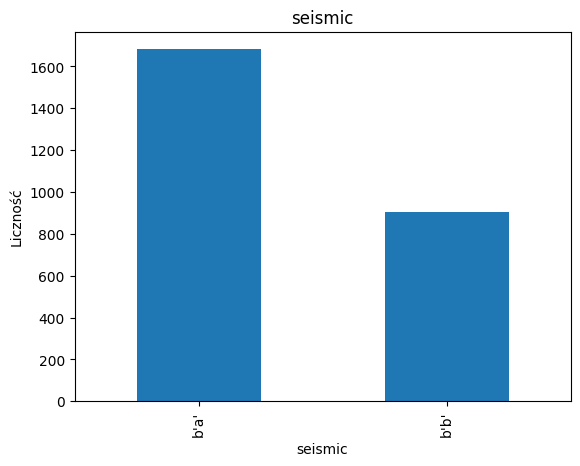

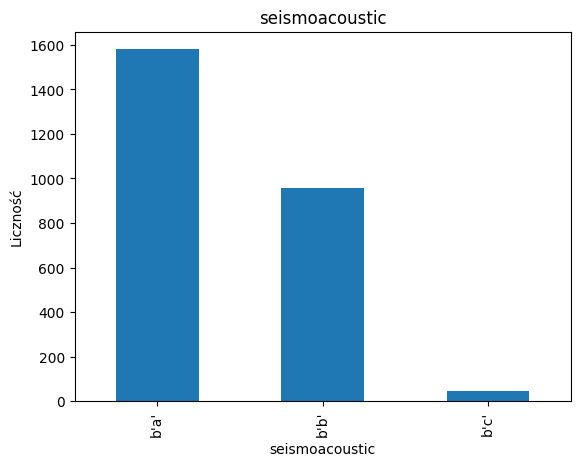

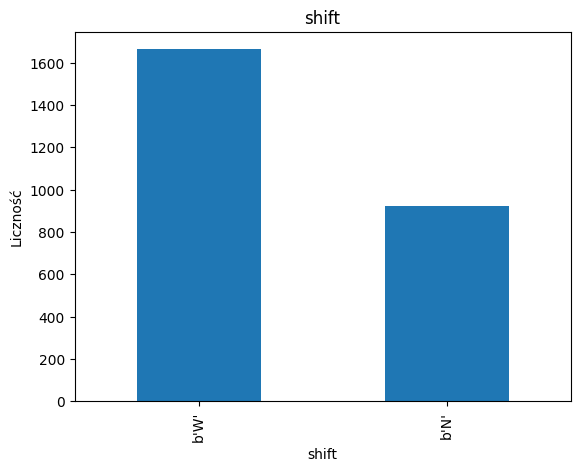

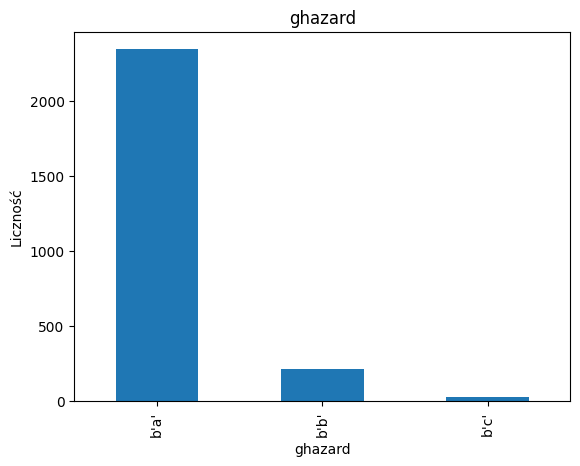

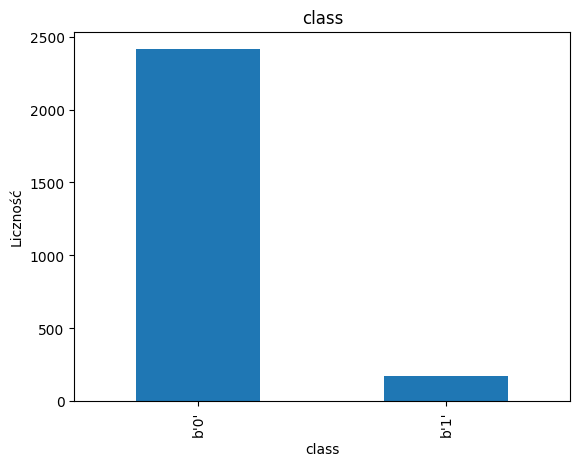

In [12]:
import matplotlib.pyplot as plt

for col in cat_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.ylabel("Liczność")
    plt.show()

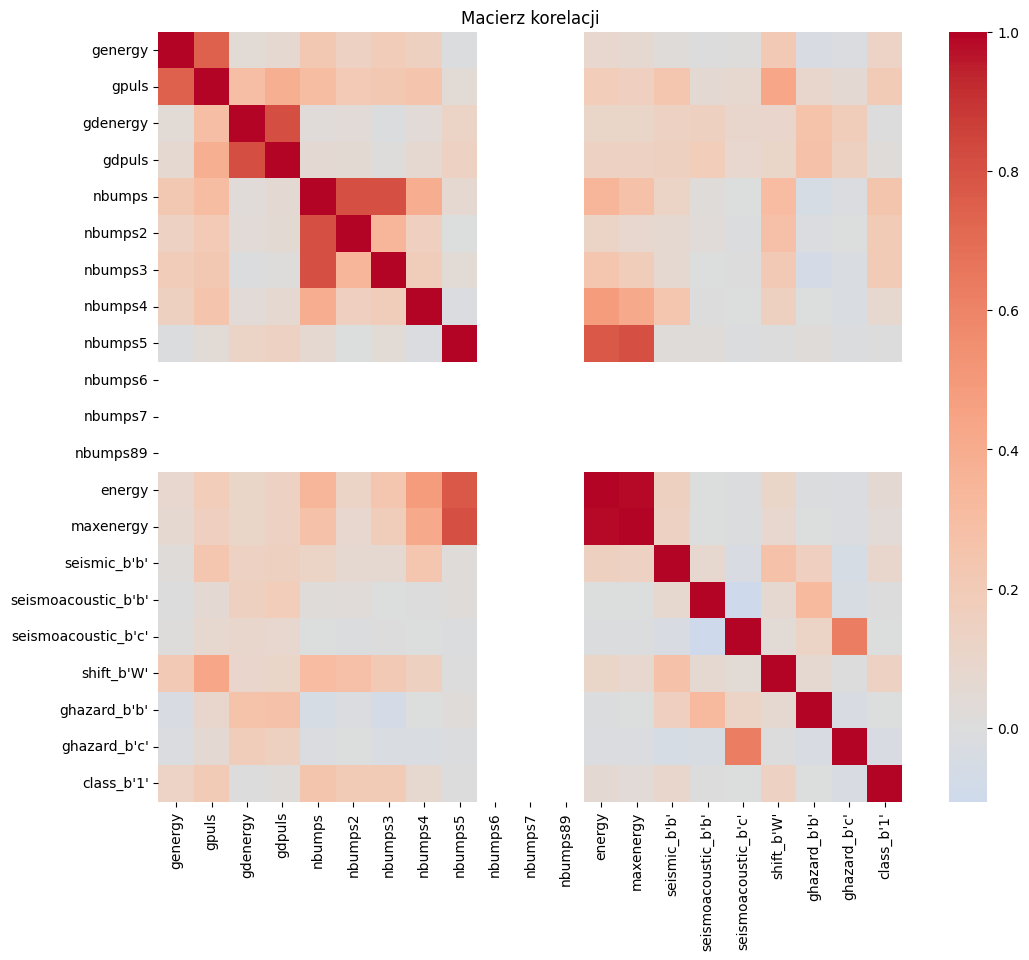

In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)
corr = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Macierz korelacji")
plt.show()